# Students dropout rate

Data used in this notebook comes from - https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Python Work/Tiny Projects/Data_Science_students_dropout/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 1. Taking a look at the data

In [152]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [154]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [155]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Target', ylabel='count'>

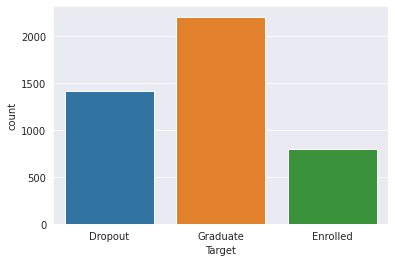

In [156]:
sns.countplot(x='Target', data=df)

In [157]:
#Use if there is no output but ONLY if necessary since its takig forever to generate
#sns.pairplot(df, hue='Target')

### 1.1 "Mother's qualification" and "Father's qualification"

<AxesSubplot:xlabel="Mother's qualification", ylabel='count'>

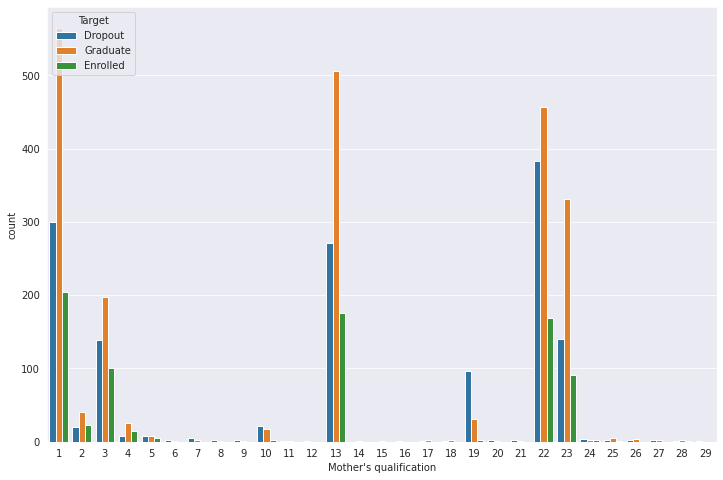

In [158]:
plt.figure(figsize=(12,8))
sns.countplot(x="Mother's qualification", hue="Target", data=df)

In [159]:
df["Mother's qualification"].sort_values().value_counts()

1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
24       8
7        8
26       6
28       4
6        4
27       4
9        3
17       3
18       3
8        3
20       3
21       3
11       2
15       1
16       1
14       1
12       1
29       1
Name: Mother's qualification, dtype: int64

In [160]:
df.where(df["Mother's qualification"].value_counts() < 3).dropna()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
11,1.0,1.0,1.0,12.0,1.0,1.0,1.0,13.0,28.0,10.0,...,0.0,8.0,8.0,7.0,13.214286,0.0,12.7,3.7,-1.70,Graduate
12,1.0,1.0,2.0,16.0,1.0,1.0,1.0,13.0,27.0,5.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,12.7,3.7,-1.70,Dropout
14,1.0,1.0,1.0,6.0,1.0,1.0,1.0,23.0,27.0,6.0,...,0.0,5.0,5.0,5.0,12.000000,0.0,10.8,1.4,1.74,Graduate
15,1.0,1.0,1.0,15.0,1.0,1.0,1.0,13.0,27.0,10.0,...,0.0,6.0,7.0,0.0,0.000000,0.0,15.5,2.8,-4.06,Dropout
16,1.0,9.0,1.0,10.0,1.0,1.0,1.0,13.0,28.0,6.0,...,0.0,6.0,14.0,2.0,11.000000,0.0,10.8,1.4,1.74,Enrolled
29,1.0,8.0,2.0,12.0,1.0,1.0,1.0,3.0,3.0,2.0,...,0.0,7.0,7.0,6.0,13.716667,0.0,16.2,0.3,-0.92,Enrolled


<AxesSubplot:xlabel="Father's qualification", ylabel='count'>

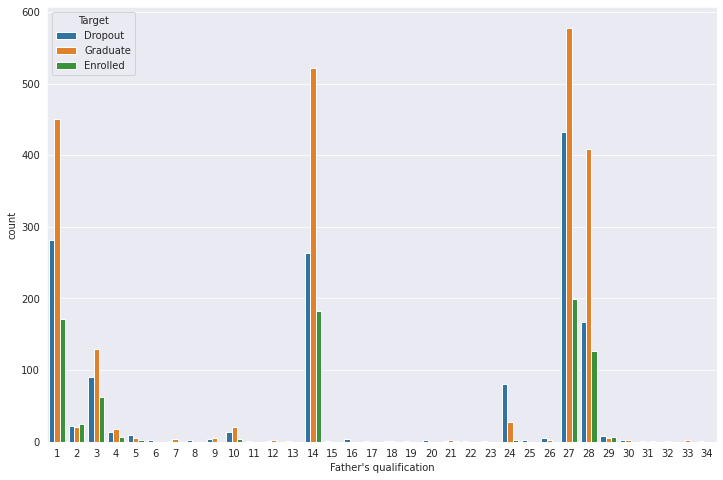

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(x="Father's qualification", hue="Target", data=df)

### 1.2 Taking a look at "Application order"

<AxesSubplot:xlabel='Target', ylabel='Application order'>

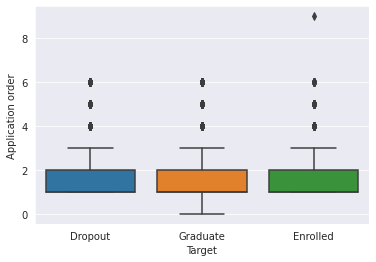

In [162]:
sns.boxplot(x="Target", y="Application order", data=df)

In [163]:
df[df["Application order"] > 6]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2629,1,12,9,17,0,1,1,23,28,10,...,0,5,7,5,14.333333,0,10.8,1.4,1.74,Enrolled


In [164]:
df[df["Application order"] == 0]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2778,1,4,0,4,1,3,1,1,27,5,...,8,12,22,12,13.214286,0,15.5,2.8,-4.06,Graduate


Since there is exactly one instance out of '4424' where "Application Order" is greater than '6' and exactly one instance out of '4424' where it is equal to '0' they could be considered an anomalies and in my opinion shall be removed.

In [165]:
df_prime = df.copy() #Unmodified version if something goes wrong

In [166]:
df = df_prime.copy()
df = df.drop([2629, 2778])
df[(df["Application order"] > 6) | (df["Application order"] == 0)]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


### 1.3 A quick peak at "Debtor"

<AxesSubplot:xlabel='Debtor', ylabel='count'>

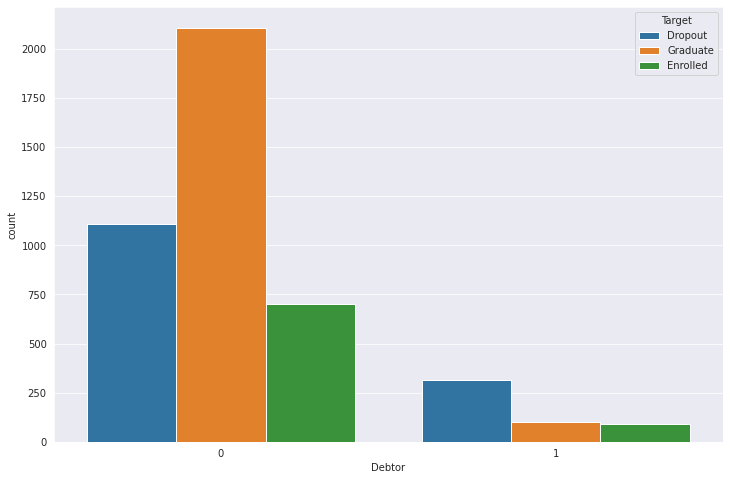

In [167]:
plt.figure(figsize=(12,8))
sns.countplot(x="Debtor", data=df, hue='Target')

### 1.4 "International" vs "Nacionality"

In [168]:
df["International"].unique()

array([0, 1])

In [169]:
df["Nacionality"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [170]:
df[df["International"] == 0]["Nacionality"].unique()

array([1])

<AxesSubplot:xlabel='Nacionality', ylabel='count'>

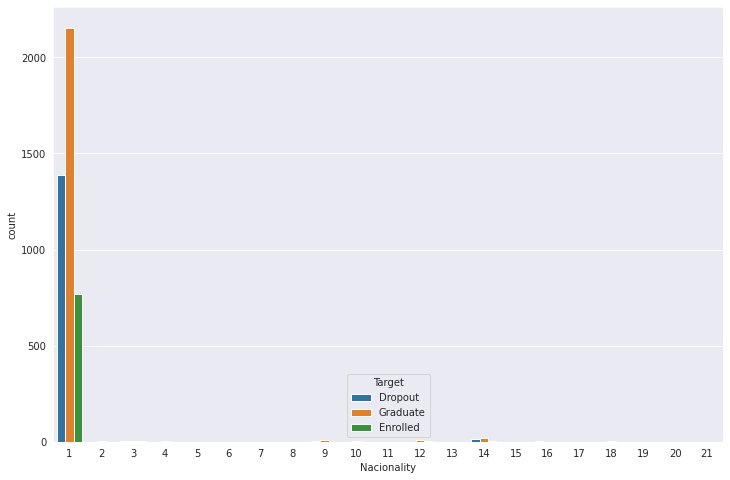

In [171]:
plt.figure(figsize=(12,8))
sns.countplot(x="Nacionality", data=df, hue="Target")

In [172]:
df["Nacionality"].value_counts()

1     4312
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: Nacionality, dtype: int64

In [173]:
df["Nacionality"].value_counts().values[1:].sum()

110

In [174]:
df["International"].value_counts()

0    4312
1     110
Name: International, dtype: int64

In [175]:
df = df.drop("Nacionality", axis=1)

### 1.5 "Scholarship holder"

<AxesSubplot:xlabel='Scholarship holder', ylabel='count'>

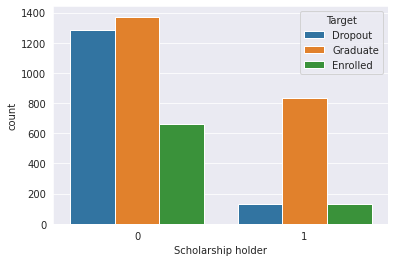

In [176]:
sns.countplot(x="Scholarship holder", data=df, hue="Target")

In [177]:
df["Application mode"].unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11])

In [178]:
cat_columns = ["Marital status", "Application mode", "Course", "Previous qualification",
               "Mother's qualification", "Father's qualification",
               "Mother's occupation", "Father's occupation"]

for column in cat_columns:
  dummy = pd.get_dummies(df[column], drop_first=True)
  df = pd.concat([df, dummy], axis=1)
  df = df.drop(column, axis=1)

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = df.drop("Target", axis=1).values
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()

In [183]:
X_train = scaler.fit_transform(X_train)

In [184]:
X_test = scaler.transform(X_test)

## 2. Trying to tackle the problem with `LogisticRegression()`

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
model_1 = LogisticRegression(max_iter=200, verbose=1)

In [187]:
model_1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=200, verbose=1)

In [188]:
preds_1 = model_1.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix, classification_report

In [190]:
print(confusion_matrix(y_test, preds_1))
print(classification_report(y_test, preds_1))

[[213  23  39]
 [ 49  64  55]
 [ 21  19 402]]
              precision    recall  f1-score   support

     Dropout       0.75      0.77      0.76       275
    Enrolled       0.60      0.38      0.47       168
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.75      0.77      0.75       885



## 3. Trying to tackle the problem with `RandomForestClassifier()`

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
model_2 = RandomForestClassifier(n_estimators=150, verbose=1)

In [193]:
model_2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


RandomForestClassifier(n_estimators=150, verbose=1)

In [194]:
preds_2 = model_2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [195]:
print(confusion_matrix(y_test, preds_2))
print(classification_report(y_test, preds_2))

[[210  17  48]
 [ 46  52  70]
 [ 13  12 417]]
              precision    recall  f1-score   support

     Dropout       0.78      0.76      0.77       275
    Enrolled       0.64      0.31      0.42       168
    Graduate       0.78      0.94      0.85       442

    accuracy                           0.77       885
   macro avg       0.73      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

